# 12_MiniAlexNet-unsupervised-SBATCH


%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.simple_mlp_train_results import UnsupervisedMLPTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import CNNUnsupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [30]:
test_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_fast/sbatch-TEST_bs-32_sf-0.05_sl-49_vr-6_nti-3_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

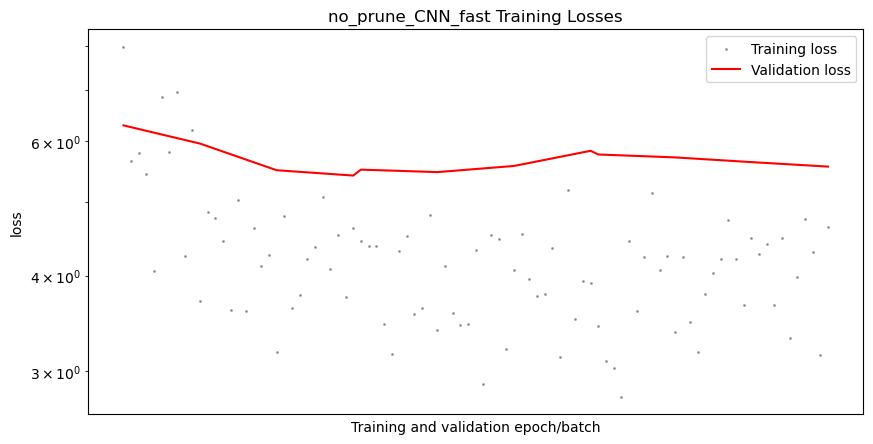

In [31]:
test_results.plot_training_losses()

In [32]:
test_results.model_attr

{'gamma': 0.1,
 'prune_prob': 0.0,
 'prune_history': [0, 0, 0],
 'conv1_kernel_count_history': [tensor(64), tensor(64), tensor(64)],
 'conv2_kernel_count_history': [tensor(256), tensor(256), tensor(256)],
 'total_conv_kernel_count_history': [320, 320, 320],
 'prune_prob_history': [0.0, 0.0, 0.0],
 'num_training_iter': 3,
 'random_seed': 4}

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

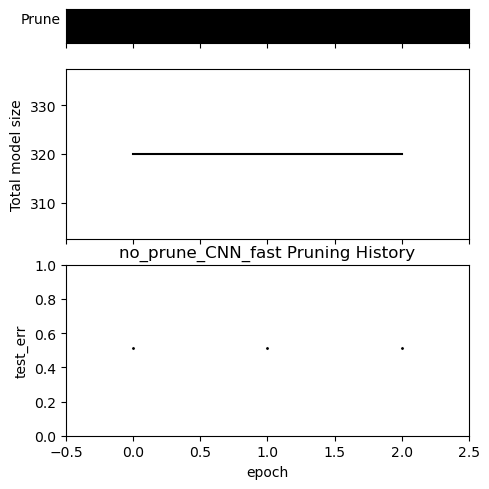

In [33]:
test_results.plot_pruning()

In [34]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


{'num_training_iter': 3, 'num_classes': 2, 'gamma': 0.1, 'verbose': False, 'random_seed': 4, 'in_channels': 1}


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '2D Embeddings of Image Pairs'}, xlabel='Embedding dimension 1', ylabel='Embedding dimension 2'>)

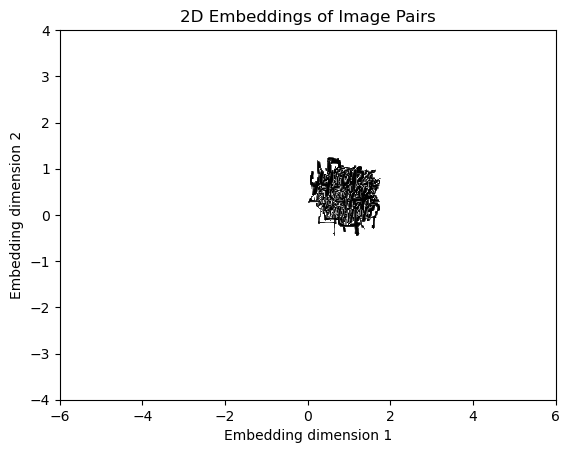

In [41]:
test_results.set_trained_model(2)
test_results.plot_image_embeddings(train_pair_dataloader, num_pairs_per_batch=2)

# Quick runs

```
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_no-prune_CNN_fast.sh 
Submitted batch job 56452014
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_activity-prune_CNN_fast.sh 
Submitted batch job 56453094
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_random-prune_CNN_fast.sh 
Submitted batch job 56453111
```